In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [2]:
dados = pd.read_pickle('Dados')

In [3]:
dados.head(5)

,structure,is_metal,composition,melting_point,thermal_conductivity,H,He,Li,Be,B,...,Es,Fm,Md,No,Lr,band center,density,vpa,packing fraction,formula
0,"[[0. 1.78463544 1.78463544] Cr, [1.784...",True,"(Cr, Ni)",2067.000000,93.250000,0.0,0,0.00,0.0,0.0,...,0,0,0,0,0,3.877061,7.839811,11.367855,0.984973,Cr3Ni
1,"[[-2.13764909 -2.12540569 -2.14704542] Cs, [-6...",True,"(Cs, Rb, As)",568.016667,48.000000,0.0,0,0.00,0.0,0.0,...,0,0,0,0,0,3.001296,3.119812,52.035996,0.860650,CsRbAs
2,"[[4.84254968 2.09688542 5.99234976] Li, [4.842...",True,"(Li, Co, Ge, O)",459.443500,31.765948,0.0,0,0.15,0.0,0.0,...,0,0,0,0,0,5.755310,4.366641,10.431076,0.452126,Li3Co2(GeO4)3
3,"[[0. 0. 0.] In, [2.50951266 1.77449342 4.34660...",True,"(In, Sb)",666.765000,53.000000,0.0,0,0.00,0.0,0.0,...,0,0,0,0,0,3.844518,6.765321,29.033879,0.488543,InSb
4,"[[-1.49720213 4.39586266 1.33097652] Hf, [3....",True,"(Hf, Mg, Sb)",1118.472500,125.875000,0.0,0,0.00,0.0,0.0,...,0,0,0,0,0,3.883659,4.099643,22.585298,0.626467,HfMg6Sb


In [4]:
features = list(dados.columns)
features.remove("structure")
features.remove("is_metal")
features.remove("composition")
features.remove("formula")
X = dados[features]

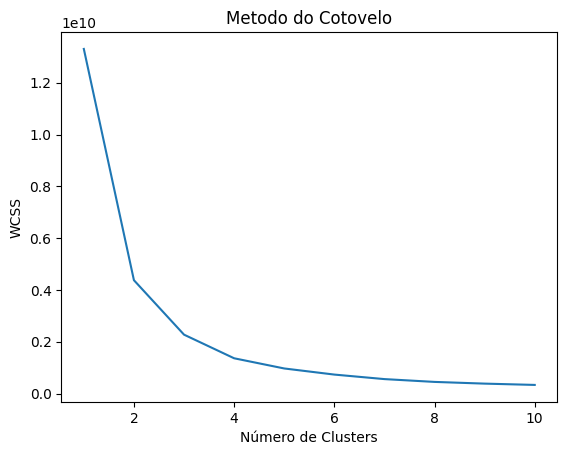

In [17]:


# use elbow mwthod to find optimal number of clusters

# with in cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Metodo do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

 

sil = []
kmax = 10

 

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k,init="k-means++", max_iter=300, n_init=10).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

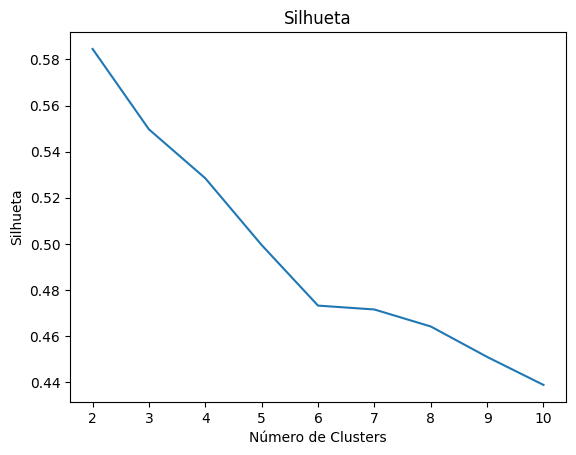

In [25]:
plt.plot(range(2, 11), sil)
plt.title("Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhueta")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000, n_init=10) 
y_pred = kmeans.fit_predict(X)

In [13]:
scatter1 = go.Scatter3d(
    x=X[y_pred == 0].iloc[:, 0],
    y=X[y_pred == 0].iloc[:, 1],
    z=X[y_pred == 0].iloc[:, -4],
    mode="markers",
    marker=dict(
        size=2, symbol="circle", line=dict(color="rgba(0, 0, 0)", width=0.5)
    ),
)
scatter2 = go.Scatter3d(
    x=X[y_pred == 1].iloc[:, 0],
    y=X[y_pred == 1].iloc[:, 1],
    z=X[y_pred == 1].iloc[:, -4],
    mode="markers",
    marker=dict(
        size=2, symbol="circle", line=dict(color="rgba(0, 0, 0)", width=0.5)
    ),
)
scatter3 = go.Scatter3d(
    x=X[y_pred == 2].iloc[:, 0],
    y=X[y_pred == 2].iloc[:, 1],
    z=X[y_pred == 2].iloc[:, -4],
    mode="markers",
    marker=dict(
        size=2, symbol="circle", line=dict(color="rgba(0, 0, 0)", width=0.5)
    ),
)
scatter4 = go.Scatter3d(
    x=X[y_pred == 3].iloc[:, 0],
    y=X[y_pred == 3].iloc[:, 1],
    z=X[y_pred == 3].iloc[:, -4],
    mode="markers",
    marker=dict(
        size=2, symbol="circle", line=dict(color="rgba(0, 0, 0)", width=0.5)
    ),
)
# centroids X, Y Coordinates can be obtained through kmeans.cluster_centers_
scatter5 = go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    z=kmeans.cluster_centers_[:, -4],
    mode="markers",
    marker=dict(color="black", symbol="cross"),
)

# Criação da lista de dados
data = [scatter1, scatter2, scatter3, scatter4, scatter5]

layout = go.Layout(
    title="Gráfico de Dispersão 3D",
    scene=dict(
        xaxis_title="Eixo X",
        yaxis_title="Eixo Y",
        zaxis_title="Eixo Z"
    ),
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=80
    ),
    width=800,
    height=600
)

# Criação da figura
fig = go.Figure(data=data, layout=layout)

# Exibição do gráfico
fig.show()